In [45]:
import random, os
import numpy as np
import torch
import glob

def seed_everything(seed: int):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    
seed_everything(42)

In [46]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [47]:
import pandas as pd

train_df = pd.read_csv('train/cleaned_train.csv')
train_df['date_orig'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df['date_int'] = train_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
train_df.head()

,id,date,employee,action,date_orig,date_int
0,1256,2022-05-24 08:08:36,2,15.0,2022-05-24 08:08:36,1653379716
1,1257,2022-05-24 08:08:37,2,4.0,2022-05-24 08:08:37,1653379717
2,1258,2022-05-24 08:12:13,3,15.0,2022-05-24 08:12:13,1653379933
3,1259,2022-05-24 08:12:25,3,2.0,2022-05-24 08:12:25,1653379945
4,1260,2022-05-24 08:12:42,3,12.0,2022-05-24 08:12:42,1653379962


In [48]:
parsed_time_train1_df=pd.read_csv('parsed_time_train2.txt',sep='\t',names=['frame','date'])
parsed_time_train1_df['date_orig'] = pd.to_datetime(parsed_time_train1_df['date'], format='%m-%d-%Y %a %H:%M:%S', errors='coerce')
parsed_time_train1_df = parsed_time_train1_df.dropna(subset=['date_orig'])
parsed_time_train1_df['date'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
parsed_time_train1_df['date_int'] = parsed_time_train1_df['date_orig'].apply(lambda x: x.value// 10 ** 9)
parsed_time_train1_df.head()

,frame,date,date_orig,date_int
0,1,2022-05-26 08:02:47,2022-05-26 08:02:47,1653552167
1,2,2022-05-26 08:02:47,2022-05-26 08:02:47,1653552167
2,3,2022-05-26 08:02:47,2022-05-26 08:02:47,1653552167
3,4,2022-05-26 08:02:47,2022-05-26 08:02:47,1653552167
4,5,2022-05-26 08:02:47,2022-05-26 08:02:47,1653552167


In [49]:
SPLIT_TRAIN1_AND_TRAIN2_ID=2522
train_df[train_df['id']>=SPLIT_TRAIN1_AND_TRAIN2_ID].head()

,id,date,employee,action,date_orig,date_int
1266,2522,2022-05-26 08:04:49,6,13.0,2022-05-26 08:04:49,1653552289
1267,2523,2022-05-26 08:04:54,6,4.0,2022-05-26 08:04:54,1653552294
1268,2524,2022-05-26 08:07:00,6,14.0,2022-05-26 08:07:00,1653552420
1269,2525,2022-05-26 08:07:11,6,5.0,2022-05-26 08:07:11,1653552431
1270,2526,2022-05-26 08:15:16,1,15.0,2022-05-26 08:15:16,1653552916


In [50]:
df = pd.merge(train_df[train_df['id']>=SPLIT_TRAIN1_AND_TRAIN2_ID], parsed_time_train1_df, on=['date'], how="outer", indicator=True)
# df = df[df['_merge'] == 'left_only']
df = df[df['_merge'] == 'both']
df.head()

,id,date,employee,action,date_orig_x,date_int_x,frame,date_orig_y,date_int_y,_merge
0,2522.0,2022-05-26 08:04:49,6.0,13.0,2022-05-26 08:04:49,1.653552e+09,282.0,2022-05-26 08:04:49,1.653552e+09,both
1,2522.0,2022-05-26 08:04:49,6.0,13.0,2022-05-26 08:04:49,1.653552e+09,283.0,2022-05-26 08:04:49,1.653552e+09,both
2,2522.0,2022-05-26 08:04:49,6.0,13.0,2022-05-26 08:04:49,1.653552e+09,284.0,2022-05-26 08:04:49,1.653552e+09,both
3,2522.0,2022-05-26 08:04:49,6.0,13.0,2022-05-26 08:04:49,1.653552e+09,285.0,2022-05-26 08:04:49,1.653552e+09,both
4,2522.0,2022-05-26 08:04:49,6.0,13.0,2022-05-26 08:04:49,1.653552e+09,286.0,2022-05-26 08:04:49,1.653552e+09,both


## У дальных дверей людей плохо видно, поэтому зумим

### передние двери

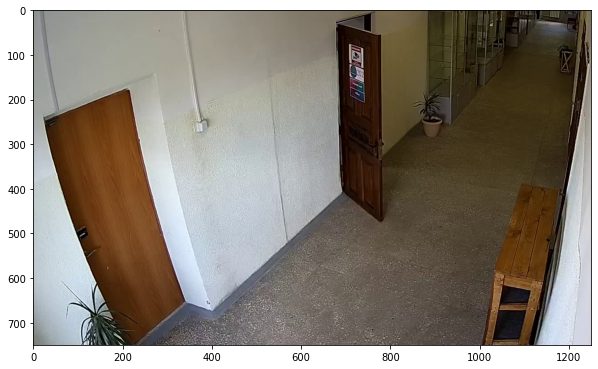

In [51]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt

train1_path="/home/hacaton_irkutsk/train/train2"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[300:1050,100:1350]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

In [52]:
front_door_borders=[300,100,1050,1350] # row_top,col_top,row_bottom,col_bottom
front_door_ids=[1,2,7,8,9]

### back doors

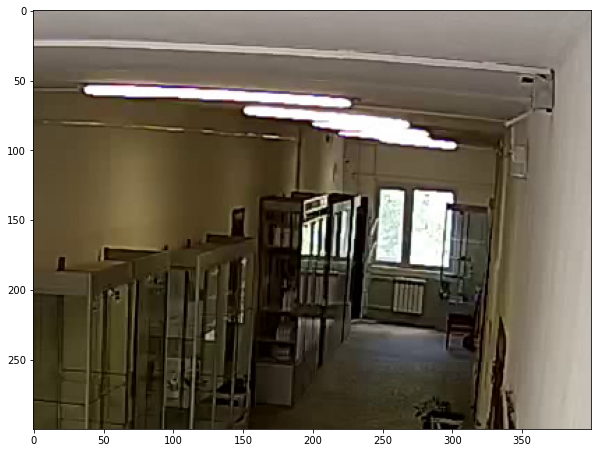

In [53]:
train1_path="/home/hacaton_irkutsk/train/train2"
img = cv2.imread(f"{train1_path}/out1.png", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
newsize = (1920,1080)
  
# resize image
resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)
crop = resized[100:400,1000:1400]


fig = plt.figure(figsize=(10, 10))
plt.imshow(crop)
plt.show()

In [54]:
back_door_borders=[100,1000,400,1400] # row_top,col_top,row_bottom,col_bottom
back_door_ids=[3,4,5,6]

# Create door detect dataset

In [55]:
start_actions={}
for i in range(1,10):
    start_actions[i+10]=i

end_actions={}
for i in range(1,10):
    end_actions[i]=i

In [56]:
action_frames={}
action_times={}
for ind in df.index:
    action=int(df['action'][ind])
    frame=int(df['frame'][ind])
    date_orig=df['date_orig_x'][ind]
    
    
    if action not in action_frames:
        action_frames[action]=[]
        action_times[action]=[]
    
    action_frames[action].append(frame)    
    action_times[action].append(date_orig)

In [57]:
for i in range(1,20):
    if i==10:
        continue
    if i in action_frames:
        print(f"Action {i}: {len(action_frames[i])}")
    else:
        print(f"Action {i}: empty")

Action 1: 10
Action 2: 1355
Action 3: 416
Action 4: 1135
Action 5: 1167
Action 6: 120
Action 7: empty
Action 8: 953
Action 9: 85
Action 11: 10
Action 12: 1333
Action 13: 410
Action 14: 1183
Action 15: 1222
Action 16: 115
Action 17: empty
Action 18: 1024
Action 19: 85


In [58]:
people_detect_model = torch.hub.load('ultralytics/yolov5','custom', 'yolov5x6') #'ultralytics/yolov5', 'custom', 'yolov5s-cls.pt'
people_detect_model.classes = [0]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-8-10 Python-3.8.10 torch-1.13.0.dev20220701+cu116 CUDA:0 (NVIDIA GeForce RTX 3090, 24268MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [59]:
action_frames[11]

[5541, 5542, 5543, 5544, 5545, 6212, 6213, 6214, 6215, 6216]

In [60]:
action_times[11]

[Timestamp('2022-05-26 10:07:46'),
 Timestamp('2022-05-26 10:07:46'),
 Timestamp('2022-05-26 10:07:46'),
 Timestamp('2022-05-26 10:07:46'),
 Timestamp('2022-05-26 10:07:46'),
 Timestamp('2022-05-26 10:15:53'),
 Timestamp('2022-05-26 10:15:53'),
 Timestamp('2022-05-26 10:15:53'),
 Timestamp('2022-05-26 10:15:53'),
 Timestamp('2022-05-26 10:15:53')]

In [61]:
door_coord_items=[]
for k in start_actions:
    if k not in action_frames:
        continue
    frames = action_frames[k]
    # row_top,col_top,row_bottom,col_bottom
    crop_box= front_door_borders if start_actions[k] in front_door_ids else back_door_borders
    print("Action ", k)
    print("front" if start_actions[k] in front_door_ids else "back")
    
    for fid in frames:
#         print('frame:', fid)
        detected_count=0
        for i in range(fid,fid+5):
#             print(i)
            img = cv2.imread(f"{train1_path}/out{int(i)}.png", cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            newsize = (1920,1080)
            resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)

            # front doors
            crop = resized[crop_box[0]:crop_box[2],crop_box[1]:crop_box[3]]

            results = people_detect_model(crop)
            if results.xyxy[0].shape == torch.Size([1, 6]):
                print('detect')
                detected_count+=1
                find_region=results.xyxy[0][0].cpu().numpy()
                bbox=np.array(find_region[:4])
                bbox = bbox.astype(int)
                bbox[1]+=crop_box[0]
                bbox[3]+=crop_box[0]
                bbox[0]+=crop_box[1]
                bbox[2]+=crop_box[1]
                door_coord_items.append({
                    'door':start_actions[k],
                    'xmin':bbox[0],
                    'ymin':bbox[1],
                    'xmax':bbox[2],
                    'ymax':bbox[3],
                })
                break


Action  11
front
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
Action  12
front
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect


detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect

detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect

detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect
detect

In [62]:
for k in end_actions:
    if k not in action_frames:
        continue
    frames = action_frames[k]
    # row_top,col_top,row_bottom,col_bottom
    crop_box= front_door_borders if end_actions[k] in front_door_ids else back_door_borders
    print("Action ", k)
    print("front" if end_actions[k] in front_door_ids else "back")
    
    for fid in frames:
#         print('frame:', fid)
        detected_count=0
        for i in reversed(range(fid-5,fid+1)):
#             print(i)
            img = cv2.imread(f"{train1_path}/out{int(i)}.png", cv2.IMREAD_UNCHANGED)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            newsize = (1920,1080)
            resized = cv2.resize(img, newsize, interpolation = cv2.INTER_AREA)

            # front doors
            crop = resized[crop_box[0]:crop_box[2],crop_box[1]:crop_box[3]]

            results = people_detect_model(crop)
            if results.xyxy[0].shape == torch.Size([1, 6]):
#                 print('detect')
                detected_count+=1
                find_region=results.xyxy[0][0].cpu().numpy()
                bbox=np.array(find_region[:4])
                bbox = bbox.astype(int)
                bbox[1]+=crop_box[0]
                bbox[3]+=crop_box[0]
                bbox[0]+=crop_box[1]
                bbox[2]+=crop_box[1]
                door_coord_items.append({
                    'door':end_actions[k],
                    'xmin':bbox[0],
                    'ymin':bbox[1],
                    'xmax':bbox[2],
                    'ymax':bbox[3],
                })
                break


Action  1
front
Action  2
front
Action  3
back
Action  5
back
Action  6
back
Action  8
front
Action  9
front


In [63]:
len(door_coord_items)

8144

In [64]:
door_coord_df = pd.DataFrame(door_coord_items)
door_coord_df.head()

,door,xmin,ymin,xmax,ymax
0,1,182,652,311,905
1,1,172,646,368,975
2,1,179,649,338,907
3,1,207,663,354,915
4,1,238,680,373,909


In [65]:
door_coord_df.to_csv('door_coord_df2_single.csv', index=False)

In [66]:
# door_coord_df[door_coord_df['door']==10].shape